In [163]:
import preprocessor

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [165]:
FIGURE_SIZE = (12, 6)

In [166]:
import os

TEST_IMG_OUTPUT_PATH = "test_images_output"

if not os.path.isdir(TEST_IMG_OUTPUT_PATH):
    os.mkdir(TEST_IMG_OUTPUT_PATH)
test_images = [ 'test_images/{}'.format(filename) for filename in os.listdir("test_images/") ]
print(test_images)

['test_images/straight_lines2.jpg', 'test_images/test6.jpg', 'test_images/test5.jpg', 'test_images/test2.jpg', 'test_images/test1.jpg', 'test_images/test3.jpg', 'test_images/straight_lines1.jpg', 'test_images/test4.jpg']


In [171]:
import camera_calibrator



In [172]:
calibrator = CameraCalibrator(9, 6)

calibrator.calibrate(CALIBRATION_IMG_PATH)

Searching for calibration images at  camera_cal/*.jpg
20 files found for calibration.
Crunching image camera_cal/calibration16.jpg ...
Crunching image camera_cal/calibration8.jpg ...
Crunching image camera_cal/calibration3.jpg ...
Crunching image camera_cal/calibration17.jpg ...
Crunching image camera_cal/calibration2.jpg ...
Crunching image camera_cal/calibration7.jpg ...
Crunching image camera_cal/calibration15.jpg ...
Crunching image camera_cal/calibration1.jpg ...
Crunching image camera_cal/calibration12.jpg ...
Crunching image camera_cal/calibration6.jpg ...
Crunching image camera_cal/calibration19.jpg ...
Crunching image camera_cal/calibration5.jpg ...
Crunching image camera_cal/calibration11.jpg ...
Crunching image camera_cal/calibration14.jpg ...
Crunching image camera_cal/calibration10.jpg ...
Crunching image camera_cal/calibration13.jpg ...
Crunching image camera_cal/calibration18.jpg ...
Crunching image camera_cal/calibration9.jpg ...
Crunching image camera_cal/calibration4.

In [173]:
mtx, dist = calibrator.get_calibration_data()
undistorter = Undistorter(mtx, dist, calibrator.get_shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


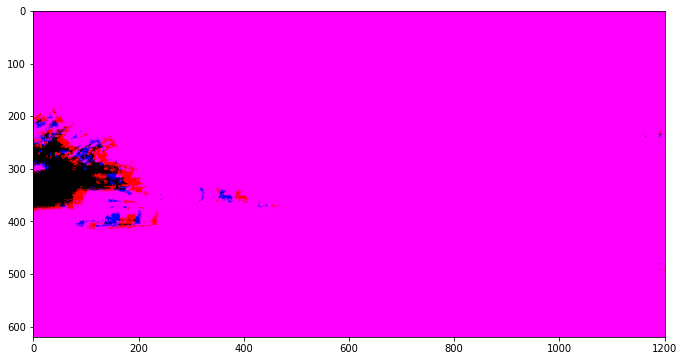

In [174]:
#
#    Calibrator and Undistorter validation
#

img = cv2.imread(test_images[0])
distorted = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
undistorted = undistorter.undistort(distorted)

out_shape = [undistorted.shape[0], undistorted.shape[1], 3]
output = np.zeros(out_shape)
output[:,:,0] = cv2.resize(distorted, (out_shape[1], out_shape[0]))
output[:,:,2] = undistorted
plt.figure(figsize=FIGURE_SIZE)
plt.imshow(output)

In [83]:
def plot_bgr(img):
    """ A helper for plotting a BGR image with matplotlib """
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def plot_gray(gray):
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(gray, cmap='gray')

def normalize(img):
    """ Expects a grayscale image """
    minimum = np.min(img)
    maximum = np.max(img)
    normalized = ((img + minimum) / (maximum - minimum) ) * 255
    return np.array(normalized, dtype=np.uint8)
    
def to_hls_mix(img, save_output=False):
    """ Expects a cv2 mat (in BGR) as input """
    # The idea is to mix Lum and Sat channels to improve lane lines visibility
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    lum = hls[:,:,1].astype(np.int16)
    sat = hls[:,:,2].astype(np.int16)
    mix = (lum * 0.1 ) + (sat * 0.66 )
    output = normalize(mix)
    if save_output :
        cv2.imwrite(os.path.join(TEST_IMG_OUTPUT_PATH, "stage_00.jpg"), output)
    return output
    

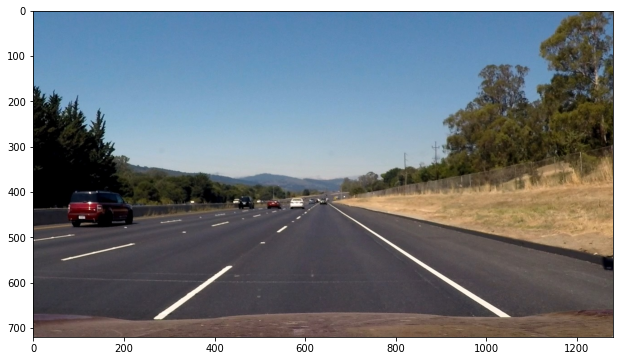

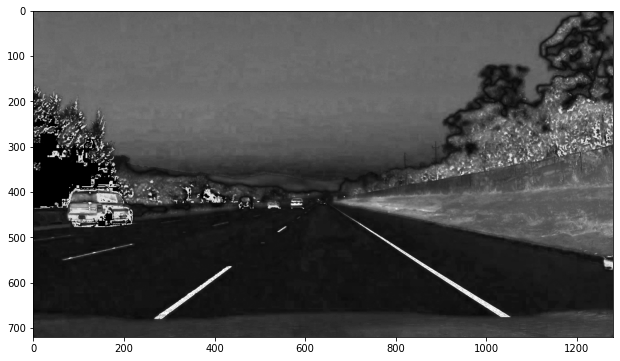

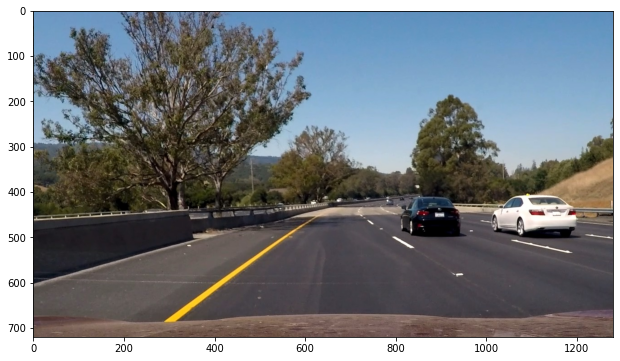

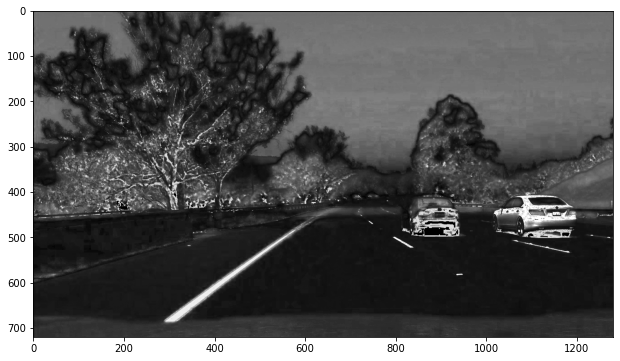

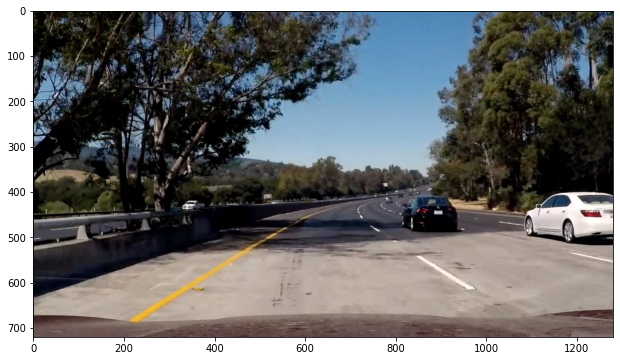

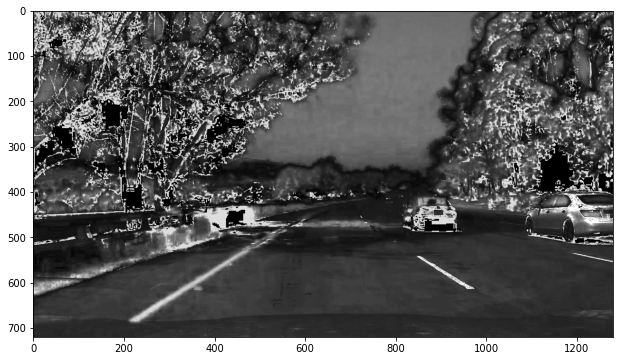

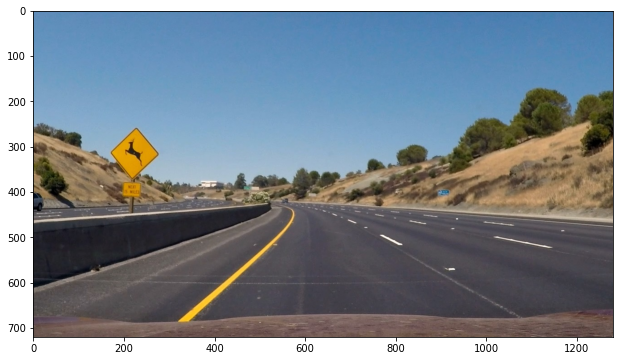

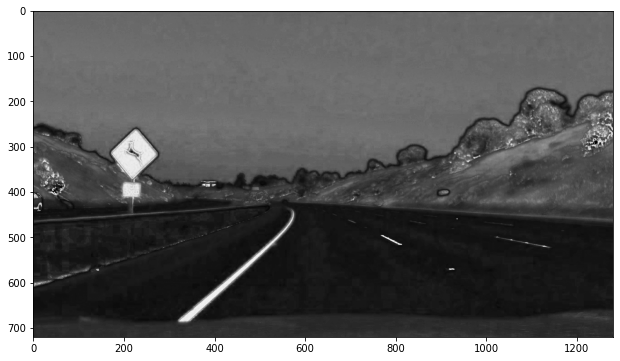

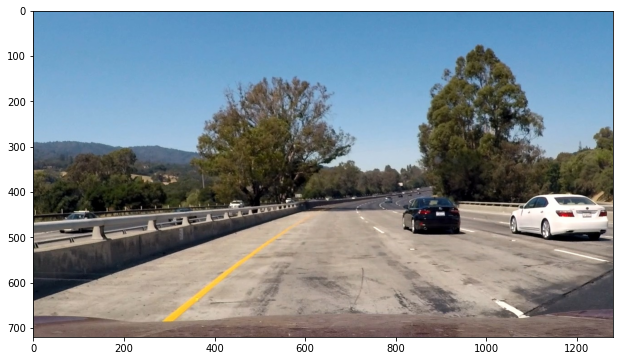

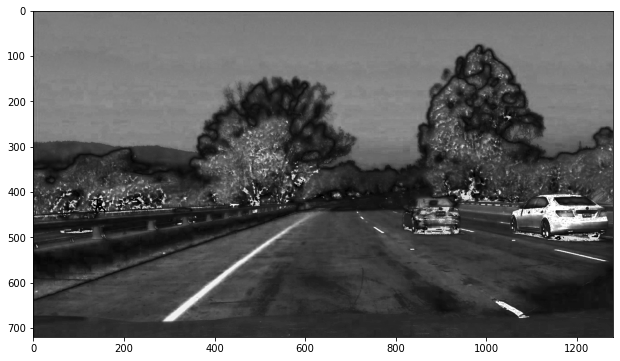

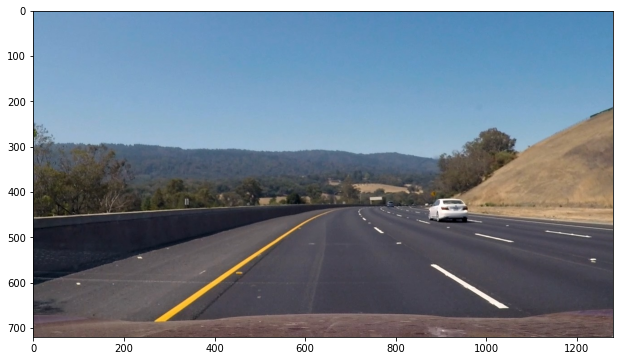

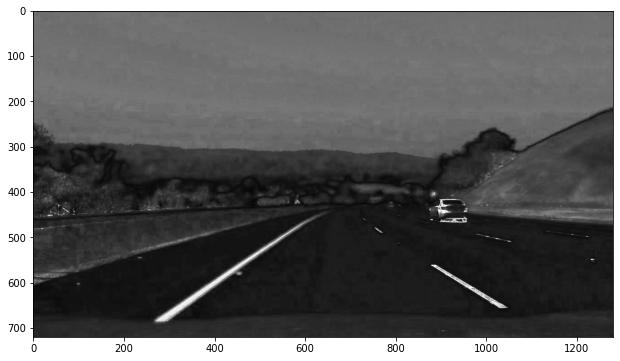

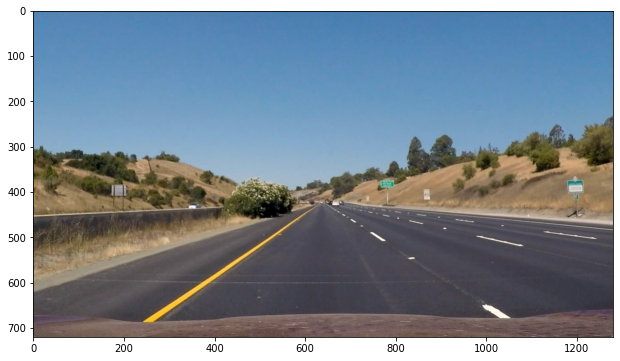

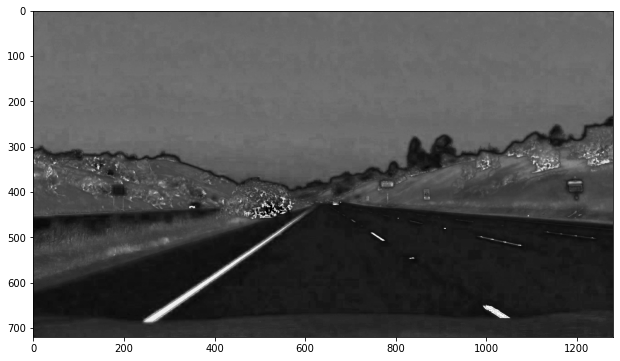

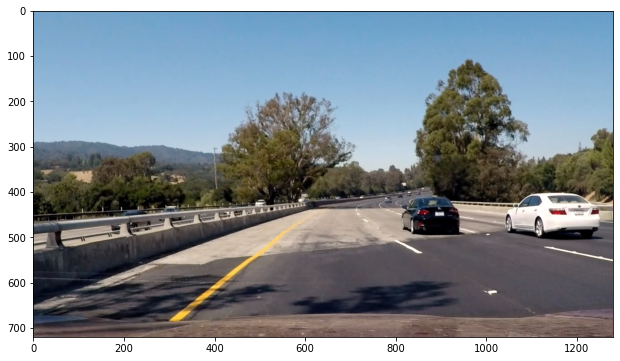

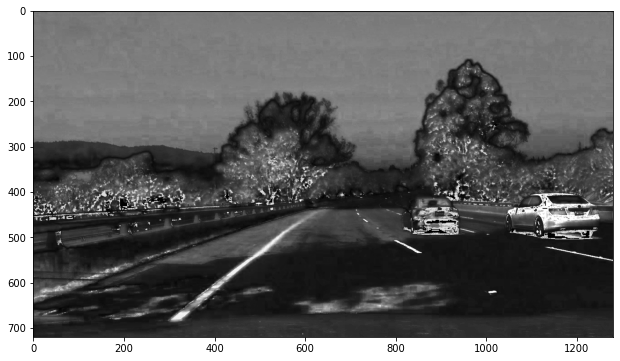

In [84]:
for test_img in test_images:
    img = cv2.imread(test_img)

    plot_bgr(img)

    stage_0_sample = to_hls_mix(img, save_output=True)
    
    plot_gray(stage_0_sample)
    

    #plot_bgr(stage_0_sample)